**Project Birlutiu Claudiu-Andrei - merge conflicts prediction**
*We focus on :
    number of changed files
    number of commits 
    number of developers which are active in each branch 
    the average length of the commit messages 
    the number of lines added 
    the number of lines deleted
    the number od files changed simultaneously in both branches
    Set to predict
        simple set: nb of changed files, commits, devlopers, lines added and lines deletetd for both branches
        extended set: includes all features from simple set + the number of simultaneously changed filed*
       


# Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

In [2]:
import numpy as np
print(np.__version__) #print numpy version, e.g., 1.21.5
import pandas
print(pandas.__version__)

1.22.4
1.4.2


In [3]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
#pentru salvarea figurilor si a a imaginalior rezultate
import os

# to make this notebook's output stable across runs
np.random.seed(42)

#pentru salvarea figurilor/ chart-urilor
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "merge_conflicts_figure"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images_merge_conflicts", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print(f"Saving figure {fig_id}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Import data from csv file

In [6]:
MERGE_CONFLICTS_PATH = os.path.join('merge_datasets', 'merge_conflicts_data', 'MergeConflictsDataset.csv')
def load_from_csv_file(csv_path=MERGE_CONFLICTS_PATH):
    return pandas.read_csv(csv_path)
    

*Incarcarea datelor dintr-un fisierul csv*

In [7]:
merge_conflicts = load_from_csv_file()
merge_conflicts.head(10)

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.400000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.563830,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.000000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.800000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.500000,43.5,1
5,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,fe463db016c4b34d66c742165fc89d702be575b9,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,1,1,24,...,0,0,0,0,0,31,31,31.000000,31.0,0
6,f8ca5065f2fc5cfc91519de3b20446d91ec0d39c,7e61fc136050be2e5057f615541c0efba38deb07,5ee46715edf40e115fbfbdafd4bc8a8b51c11bb1,f5ad47b47074b437e5b50d10c277679fcd765ab9,0,0,0,1,1,286,...,0,0,0,0,0,22,22,22.000000,22.0,0
7,72fd7d81c9c7e28af8740f5a1b210a803290383d,5b8e52ff69f338c9749ab871e1569e3292310f15,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,d9b2ac5d01163ca45b84ead150a6119e26ee0593,0,0,0,1,1,126,...,0,0,0,0,0,54,54,54.000000,54.0,0
8,f80486b832b493832b1f2df38614928911d41b1d,65db38d6222bb2961916c11360db32ab3ace3576,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,65db38d6222bb2961916c11360db32ab3ace3576,1,0,0,0,2,14,...,1,0,0,0,0,34,36,35.000000,35.0,0
9,af577a42e0e5686dc9393fc9f97d95703e966de1,0d92bec79ad16347c7fa844e40c2fb8420f4efb5,b6c7625c6fb39656d49558672355841eea9d5b65,1392056d73b28a15a17e2937df4129d09fc24e07,1,1,1,7,1,3814,...,2,0,0,0,1,24,84,38.456522,30.0,0


In [8]:
merge_conflicts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26988 entries, 0 to 26987
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   commit           26988 non-null  object 
 1   parent1          26988 non-null  object 
 2   parent2          26988 non-null  object 
 3   ancestor         26987 non-null  object 
 4   is pr            26988 non-null  int64  
 5   added lines      26988 non-null  int64  
 6   deleted lines    26988 non-null  int64  
 7   devs parent1     26988 non-null  int64  
 8   devs parent2     26988 non-null  int64  
 9   time             26988 non-null  int64  
 10  nr files         26988 non-null  int64  
 11  added files      26988 non-null  int64  
 12  deleted files    26988 non-null  int64  
 13  renamed files    26988 non-null  int64  
 14  copied files     26988 non-null  int64  
 15  modified files   26988 non-null  int64  
 16  nr commits1      26988 non-null  int64  
 17  nr commits2 

**Se vor sterge campurile irelevante : numele commit-ului, id-urile branch-urilor si id-ul ancestor-ului**

In [9]:
data_filtred = merge_conflicts.drop(['commit','parent1','parent2','ancestor'], axis=1)

In [10]:
#vizualizare date in functie de fiecare coloana
data_filtred.head()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,1,5,0,0,1,23,0,0,0,0,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,0,1166,11267,1,2,371,3,7,199,2,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,1,0,0,0,1,22,0,0,0,0,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,1,0,0,2,1,24,1,0,0,0,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,0,0,0,1,2,2,1,0,0,0,...,0,0,0,0,0,31,56,43.50000,43.5,1


In [11]:
data_filtred.describe()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
count,26988.000000,2.698800e+04,2.698800e+04,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,...,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000
mean,0.777827,4.253755e+02,2.502937e+02,4.654254,1.911368,240.794501,0.751704,2.430006,1.395768,0.969690,...,4.314177,0.954980,1.338187,0.096228,1.007411,51.388024,104.634023,69.444945,68.011653,0.054432
std,0.415714,8.885240e+03,1.027630e+04,12.227462,6.532536,908.246361,10.617551,67.821839,90.589096,64.227302,...,12.921030,3.202485,4.268581,0.541770,6.031895,34.555932,89.457205,40.054486,39.381905,0.226872
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000e+00,1.000000e+00,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,47.000000,41.000000,40.000000,0.000000
50%,1.000000,1.100000e+01,2.000000e+00,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,88.000000,66.333333,65.000000,0.000000
75%,1.000000,7.500000e+01,1.500000e+01,3.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,67.000000,131.000000,91.689744,90.000000,0.000000
max,1.000000,1.140945e+06,1.140456e+06,158.000000,182.000000,21513.000000,1152.000000,10404.000000,10396.000000,10398.000000,...,176.000000,48.000000,78.000000,16.000000,312.000000,1326.000000,1326.000000,1326.000000,1326.000000,1.000000


***Determine labels for column***

In [12]:
try:
    from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [13]:
encoder = LabelEncoder()
for column in data_filtred.columns:
    data_filtred[column] = encoder.fit_transform(data_filtred[column].values)
data_filtred.head(3)

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,1,5,0,0,1,23,0,0,0,0,...,0,0,0,0,0,20,64,451,33,0
1,0,970,1111,1,2,371,3,7,71,2,...,0,0,0,0,0,31,116,1732,100,1
2,1,0,0,0,1,22,0,0,0,0,...,0,0,0,0,0,18,17,71,29,0


**Vizualizarea histogramelor specifice campurilor/featurerilor date**

Saving figure attribute_plots


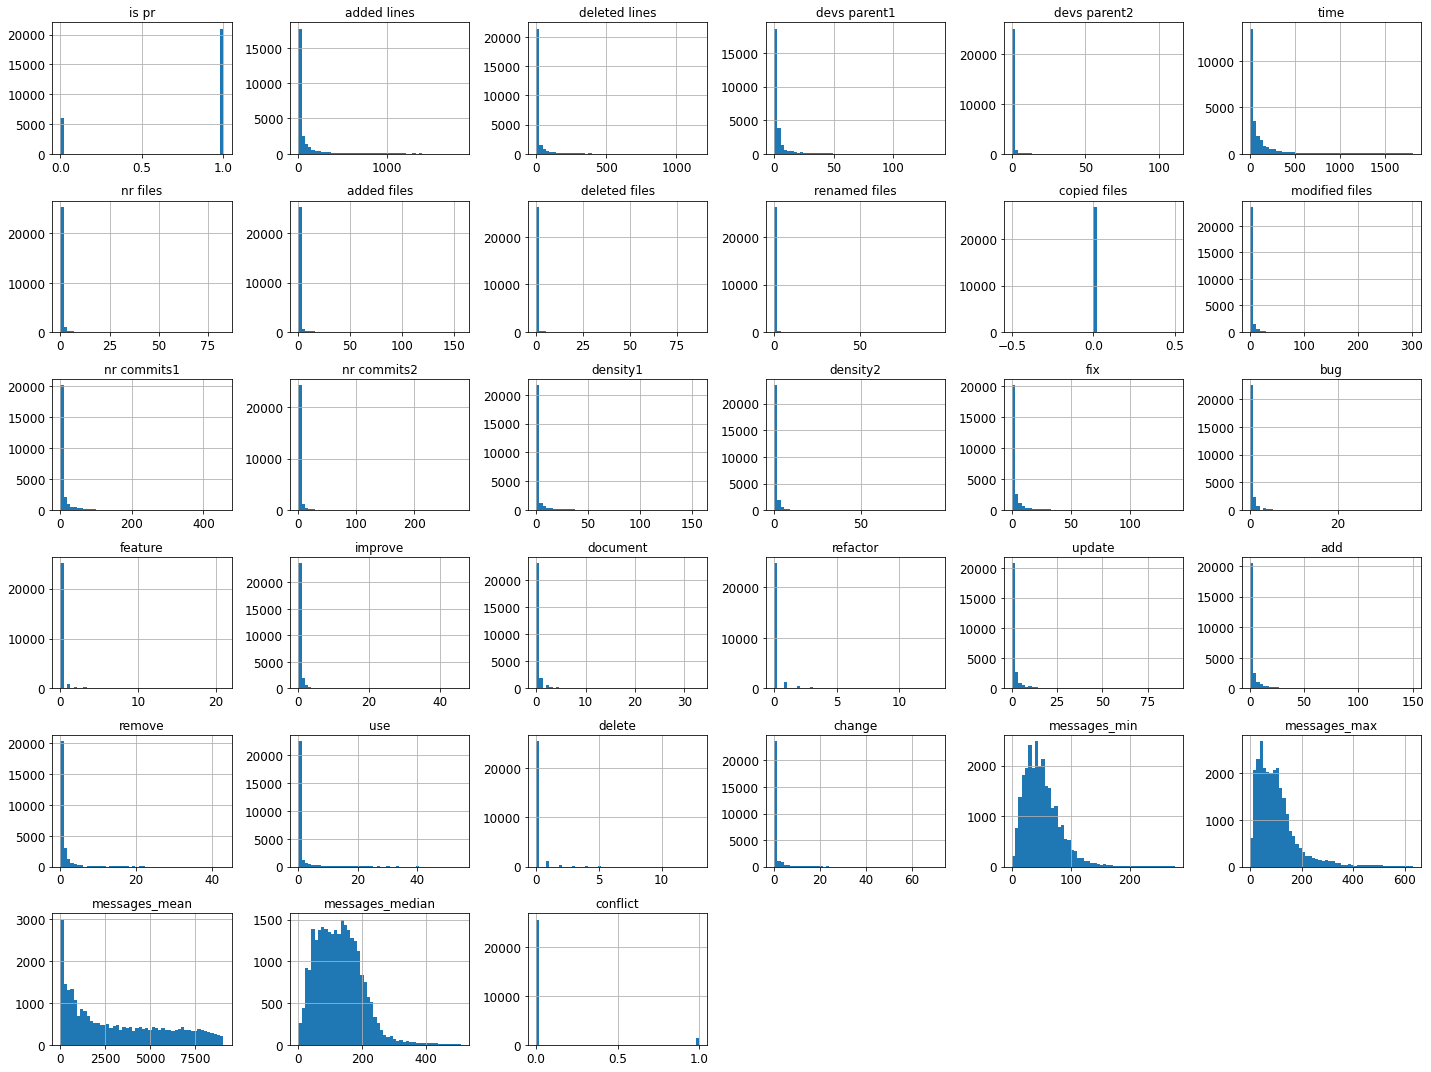

In [14]:
%matplotlib inline
data_filtred.hist(bins=50, figsize=(20,15))
save_fig("attribute_plots")
plt.show()

**in urma analizei histogramelor observam ca in setul de date e un numar mic de conflicte raportat la toate merge-urile**

# Split data in train data set and test data set

In [15]:
import numpy as np
import math as m

#in continuare se returneaza un dictionar cu set-urile: acesta contine 80% din totalul de date pentru training si 20% pentru test
def split_dataset_train_test(data_set, train_ratio=0.8):
    #se amesteca datele pentru a alege random valori din dataset-ul dat ca input
    all_data_len = len(data_set)
    shuffled = np.random.permutation(all_data_len)
    train_data_len = m.floor(all_data_len*train_ratio)
    train_indices = shuffled[:train_data_len]
    test_indices = shuffled[train_data_len:]
    #se va returna dictionarul cu valori de training si cele de test
    return {'train_data': data_set.iloc[train_indices], 'test_data':data_set.iloc[test_indices]}

In [16]:
#pentru a imparti datele de test avem evode de pandas si de 
#sklearn https://data-flair.training/blogs/train-test-set-in-python-ml/
#pip install sklearn
#pip install pandas
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
def split_dataset_train_test_sklearn(data_set, train_ratio=0.8):
    data = np.random.permutation(len(data_set))
    y=data_set.is_pr
    x=data_set.drop('is_pr')
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=train_ratio)
    x_train.head()

*Affisarea rezultatelor obtinute*

In [17]:
data_dict = split_dataset_train_test(data_filtred)
print(f"Len of train data set {len(data_dict['train_data'])}\nLen of test data set {len(data_dict['test_data'])}")
print(f"First element of training data set : {data_dict['train_data'].head(1)}\nFirst element of test data set : {data_dict['train_data'].head(1)}")


Len of train data set 21590
Len of test data set 5398
First element of training data set :        is pr  added lines  deleted lines  devs parent1  devs parent2  time  \
21434      1           80              0             5             1    34   

       nr files  added files  deleted files  renamed files  ...  add  remove  \
21434         0            0              0              0  ...    3       0   

       use  delete  change  messages_min  messages_max  messages_mean  \
21434    0       0       0            43           105           2201   

       messages_median  conflict  
21434              108         0  

[1 rows x 33 columns]
First element of test data set :        is pr  added lines  deleted lines  devs parent1  devs parent2  time  \
21434      1           80              0             5             1    34   

       nr files  added files  deleted files  renamed files  ...  add  remove  \
21434         0            0              0              0  ...    3       0   



**Split the data in two: training and test**

In [18]:
#from sklearn.model_selection import train_test_split
#X_train_set, X_test_set, y_train_set, y_train_test = train_test_split(merge_conflicts,merge_conflicts['conflict'], test_size=0.2, random_state=42)

#se va face un split de tip Satisfied pentru ca setul de date e destul de mic
from sklearn.model_selection import StratifiedShuffleSplit

#80 % va fi setul de date de training, iar 20% va fi cel de test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(data_filtred, data_filtred["conflict"]):
    train_data_set = data_filtred.loc[train_idx]
    test_data_set = data_filtred.loc[test_idx]



In [19]:
print(f"For train data set proportion of conflict:\n{train_data_set['conflict'].value_counts() / len(train_data_set)}")
print(f"For test data set proportion of conflict:\n{train_data_set['conflict'].value_counts() / len(train_data_set)}")


For train data set proportion of conflict:
0    0.945577
1    0.054423
Name: conflict, dtype: float64
For test data set proportion of conflict:
0    0.945577
1    0.054423
Name: conflict, dtype: float64


**se observa mai sus ca proportiile intre numarul de conflicte este la fel, atat in data-ul de training cat si in cel de test**

In [20]:
print(f"The length of training data set: {len(train_data_set)}")
print(f"The length of test data set: {len(test_data_set)}")

The length of training data set: 21590
The length of test data set: 5398


# Discover and visualize the data 

 **define a corr matrix **

In [21]:
#pentru a evita modificari ce se pot aduce din greseala pe datele split de training se creeaza o copie
data_discover = train_data_set.copy()

In [22]:
#crearea matricei de corelare
corr_mat = data_discover.corr()
corr_mat

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
is pr,1.000000,-0.186693,-0.173783,-0.046447,-0.223044,-0.066709,-0.198866,-0.117500,-0.067019,-0.064996,...,-0.150900,-0.134320,-0.124541,-0.052559,-0.064387,0.045989,-0.169555,-0.083763,-0.078228,-0.435649
added lines,-0.186693,1.000000,0.737907,-0.051888,0.383692,0.147053,0.153870,0.646764,0.308087,0.244913,...,0.137276,0.124465,0.086160,0.116451,0.126192,-0.105595,0.143629,0.024790,0.010195,0.217147
deleted lines,-0.173783,0.737907,1.000000,-0.061983,0.381923,0.132681,0.144366,0.515576,0.497889,0.301428,...,0.110454,0.128498,0.078219,0.085051,0.101675,-0.091627,0.101408,-0.000356,-0.011006,0.200894
devs parent1,-0.046447,-0.051888,-0.061983,1.000000,-0.015738,0.435329,0.111118,-0.032494,-0.023908,-0.023723,...,0.772918,0.687588,0.685913,0.301766,0.562916,0.020748,0.472085,0.229638,0.210949,0.078530
devs parent2,-0.223044,0.383692,0.381923,-0.015738,1.000000,0.293475,0.171576,0.398536,0.197403,0.161839,...,0.402578,0.405751,0.156719,0.134852,0.204100,-0.085690,0.099782,-0.002283,-0.005055,0.297751
time,-0.066709,0.147053,0.132681,0.435329,0.293475,1.000000,0.108255,0.178738,0.123163,0.060666,...,0.487200,0.460587,0.284795,0.210990,0.295634,-0.078469,0.236876,0.063137,0.068785,0.164529
nr files,-0.198866,0.153870,0.144366,0.111118,0.171576,0.108255,1.000000,0.105227,0.068063,0.052081,...,0.157792,0.183860,0.164109,0.045769,0.255752,-0.071506,0.154430,0.032570,0.014330,0.370827
added files,-0.117500,0.646764,0.515576,-0.032494,0.398536,0.178738,0.105227,1.000000,0.447327,0.310743,...,0.136021,0.115517,0.089684,0.116707,0.112706,-0.085680,0.074792,-0.014303,-0.022065,0.123624
deleted files,-0.067019,0.308087,0.497889,-0.023908,0.197403,0.123163,0.068063,0.447327,1.000000,0.294833,...,0.069119,0.080342,0.046459,0.063011,0.066873,-0.049477,0.048480,-0.020210,-0.023844,0.085047
renamed files,-0.064996,0.244913,0.301428,-0.023723,0.161839,0.060666,0.052081,0.310743,0.294833,1.000000,...,0.049638,0.036193,0.030800,0.037224,0.048832,-0.039658,0.024552,-0.006748,-0.014781,0.071570


**Interogam pentru conflicts care sunt cele mai apropiate field-uri ce ii determina/influenteaza valoarea.**

In [23]:
#afisarea corlarilor pentru coloana de conflict 
corr_mat['conflict'].sort_values(ascending=False)

conflict           1.000000
nr files           0.370827
nr commits2        0.326703
devs parent2       0.297751
add                0.241274
density2           0.234313
added lines        0.217147
remove             0.209808
deleted lines      0.200894
modified files     0.176043
fix                0.170945
update             0.167064
time               0.164529
messages_max       0.151422
refactor           0.141834
change             0.136711
use                0.133694
nr commits1        0.124876
added files        0.123624
bug                0.120004
feature            0.117239
document           0.096649
improve            0.093110
deleted files      0.085047
devs parent1       0.078530
renamed files      0.071570
delete             0.061216
messages_mean      0.027676
density1           0.024700
messages_median    0.020224
messages_min      -0.091943
is pr             -0.435649
copied files            NaN
Name: conflict, dtype: float64

Din ce se observa mai sus, coloana de conflict e corelata cu: nr files, nr commits2, devs parent2, density2, added lines, deleted lines

Saving figure scatter_matrix_plot


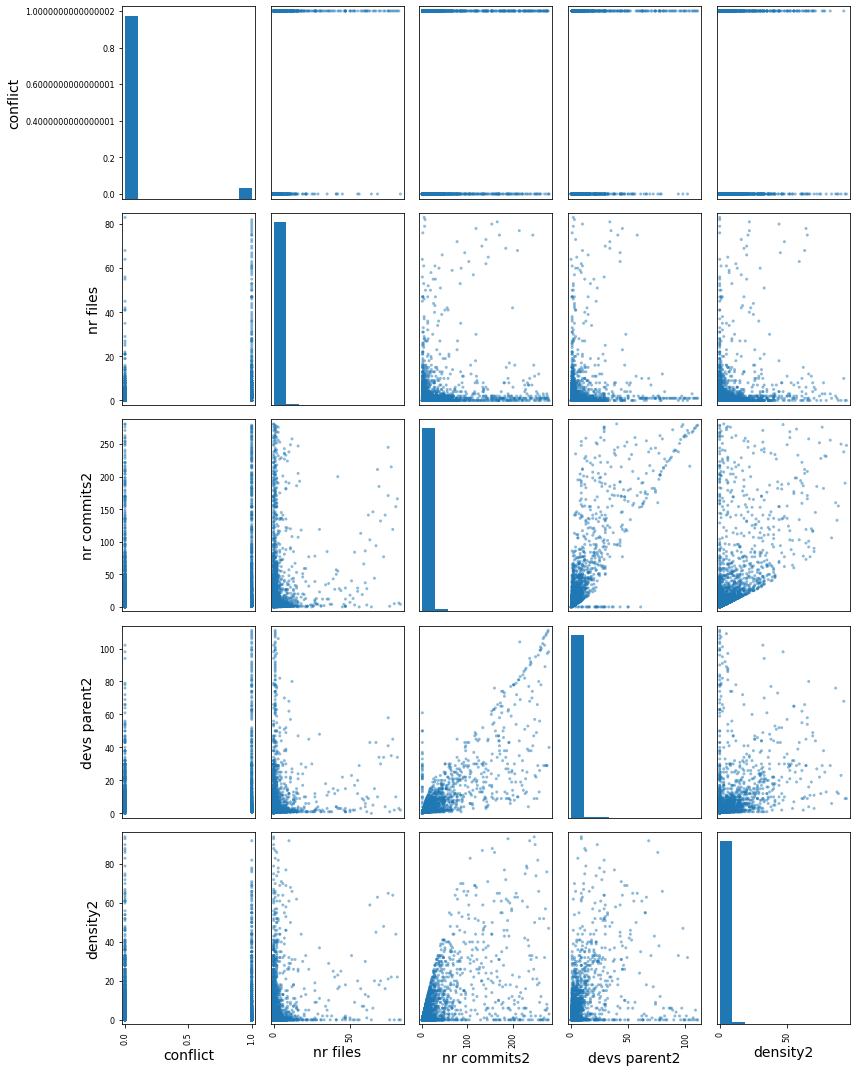

In [24]:
# se vor genera grafice de dependenta intre mai multe caractereistici prezente pentru a vedea care dintre valori sunt
#depind mult una de alta
from pandas.plotting import scatter_matrix

attributes = ["conflict","nr files","nr commits2", "devs parent2", "density2"]
scatter_matrix(data_discover[attributes], figsize=(12, 15))
save_fig("scatter_matrix_plot")

**Se observa ca daca se lucreaza simultan pe mai multe fisiere => riscul de a exista conflicte e destul de ridicat. Se observa ca: densitatea de lucru influenteaza mult aparitia conflictelor, cat si numarul de commit-uri ce au fost executate (in principiu pe al doilea branch).Numarul de dezvoltatori pe al doilea branch reprezinta din nou un criteriu bun pentru predictia conflictelor.**

Saving figure nr_files_vs_conflicts


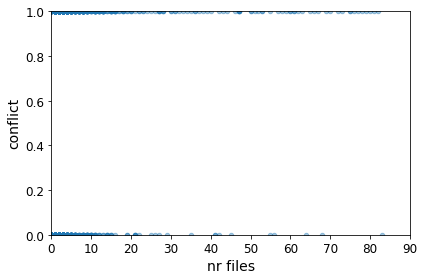

In [25]:
#se va proiecta un grafic mai mare pentru a se observa cum numarul de fisiere pe care s-a lucrat simultan 
#influenteaza generarea unui conflict in cadrul procesului de merge
data_discover.plot(kind="scatter", x="nr files", y="conflict",
             alpha=0.4)
plt.axis([0, 90, 0, 1])
save_fig("nr_files_vs_conflicts")

# Prepare data for ML algorithms

*In continuare se va pragati setul de date pentru training*

In [26]:
#se va elimina coloana de conflict din setul de training
train_data = train_data_set.drop('conflict', axis=1) 
#se vor extrage valorile din coloana conflict;
train_labels = train_data_set['conflict'].copy()
train_labels

17030    0
10400    1
15348    0
21403    0
15944    0
        ..
17324    0
11559    0
1460     0
16086    0
1258     1
Name: conflict, Length: 21590, dtype: int64

In [27]:
#se vor elimina valorile nule; 
incomplete_rows = train_data[train_data.isnull().any(axis=1)].head()
incomplete_rows

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,update,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median


,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,update,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median
17030,1,606,0,4,1,166,0,6,0,0,...,1,0,0,1,0,1,50,96,2942,131
10400,0,1,1,1,1,0,6,0,0,0,...,0,0,0,0,0,0,16,15,52,25
15348,0,123,48,1,4,35,0,1,0,0,...,1,3,1,0,0,1,43,127,4226,162
21403,1,5,3,2,1,13,0,0,0,0,...,1,2,0,1,0,0,39,85,1631,97
15944,0,1575,317,2,8,117,0,28,0,0,...,5,2,1,0,0,8,15,52,108,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17324,1,1,1,2,1,15,0,0,0,0,...,0,0,0,0,0,0,81,96,5081,171
11559,1,111,5,2,1,2,0,0,0,0,...,1,1,0,1,0,1,99,291,8451,217
1460,0,8,0,1,1,128,0,0,0,0,...,0,3,0,0,0,0,94,95,5791,183
16086,1,7,3,10,1,250,0,0,0,0,...,4,3,6,0,0,7,36,103,1729,101


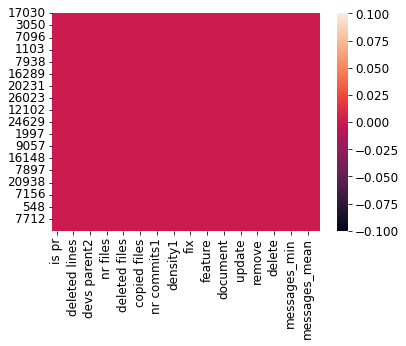

In [28]:
#verificare suplimentara pentru verifcare existentei valorilor nule
import seaborn as sb
sb.heatmap(train_data.isnull())
train_data = train_data.dropna()
train_data

**nu sunt valori nule**

# Select and train a model

In [29]:
#copierea datelor de test si se face drop la coloana de conflict
test_data = test_data_set.drop('conflict', axis=1)
test_labels= test_data_set['conflict'].copy()
test_data.head(2)

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,update,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median
25850,0,6,0,1,1,1,1,0,0,0,...,1,0,0,0,0,0,31,30,307,55
21809,1,2,2,0,1,1,0,0,0,0,...,0,0,0,0,0,0,34,33,407,61


In [30]:
#crearea unui dictionar in care sa se pastreze datele obtinute
evoultion_dictionary = {'classifier_name': [], 'classifier_score': []}

# * Decision Tree Classifier 

In [31]:
from sklearn.tree import DecisionTreeClassifier as dtc
decision_tree = dtc(criterion='entropy', max_depth=4)
decision_tree = decision_tree.fit(train_data, train_labels)
decision_tree.score(test_data, test_labels)

0.9603556872915895

In [32]:
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

* max_depth = stopping criteria pentriu extinderea arborelui de decizie; se poate aplicca si prunning

In [33]:
predictions = decision_tree.predict(test_data)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
decision_tree.predict_proba(test_data)

array([[0.67263427, 0.32736573],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.99815583, 0.00184417],
       [1.        , 0.        ],
       [1.        , 0.        ]])

*calculul acuratetii metodei*

In [35]:
from sklearn.metrics import accuracy_score
decision_tree_score = accuracy_score(test_labels, predictions)
print(f"Decision Tree Clasifier score: {decision_tree_score} ")

Decision Tree Clasifier score: 0.9603556872915895 


In [36]:
evoultion_dictionary['classifier_name'].append("Decision Tree Classifier")
evoultion_dictionary['classifier_score'].append(decision_tree_score)
evoultion_dictionary

{'classifier_name': ['Decision Tree Classifier'],
 'classifier_score': [0.9603556872915895]}

*observarea matricei de confuzie*

In [37]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(test_labels, predictions, labels=[0,1])

array([[5000,  104],
       [ 110,  184]])

*Precizia scorului obtinut pentru setul de date: *

In [38]:
from sklearn.metrics import precision_score
precision_score(test_labels, predictions)

0.6388888888888888

*create the figure with decision tree*

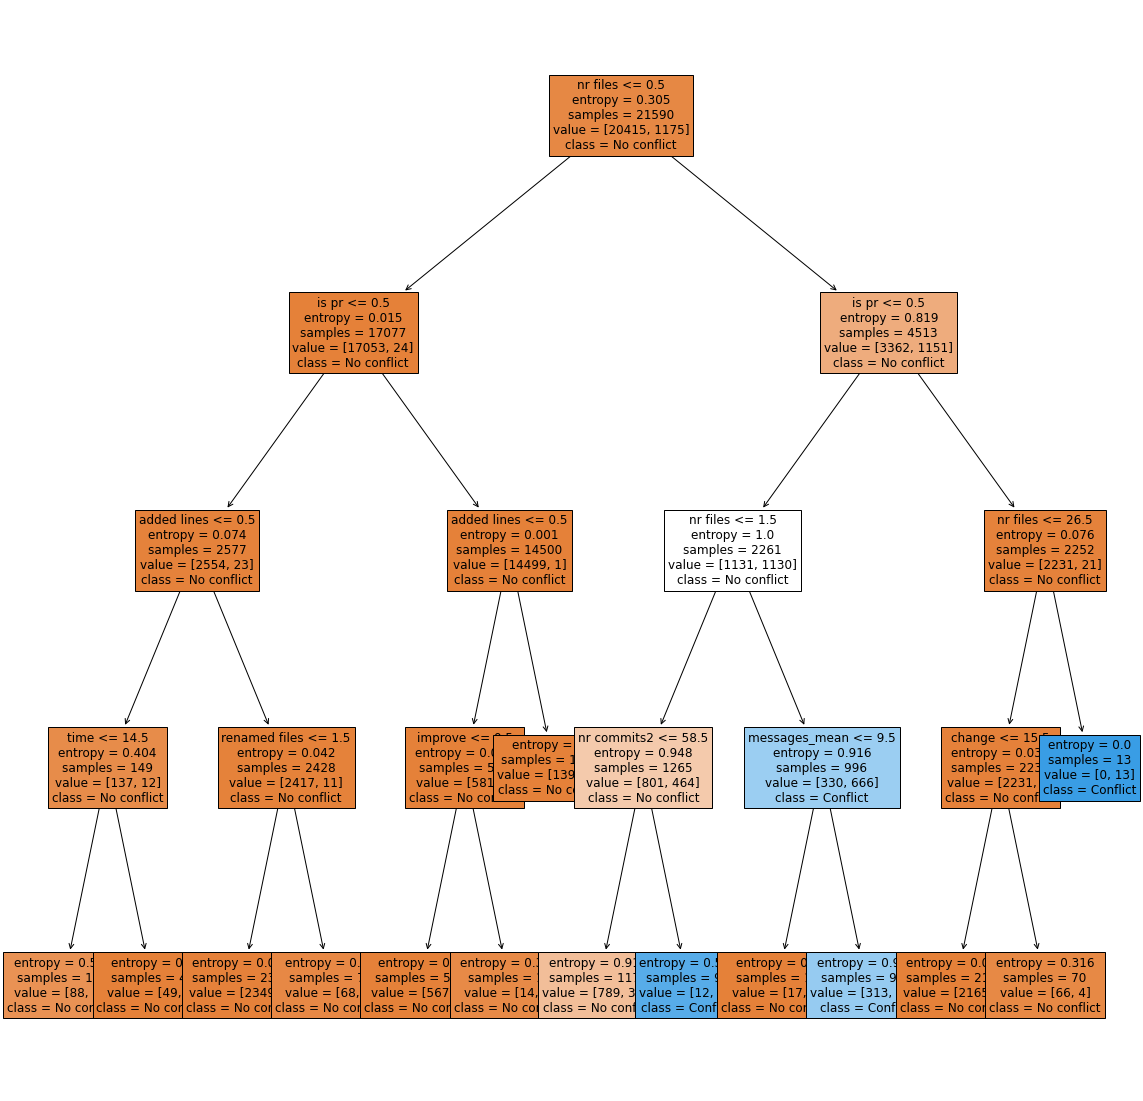

In [39]:
from sklearn import tree
from matplotlib import pyplot as plt
#extragerea proprietatilor
features_names = train_data.columns
figure = plt.figure(figsize=(20,20))
image= tree.plot_tree(decision_tree, feature_names=features_names, class_names={0:"No conflict", 1:"Conflict"},
                  filled =True,
                  fontsize=12)


*vizualizarea importantei unor caractersitic din setul de date*

In [40]:
importance_gradient = pandas.DataFrame(decision_tree.feature_importances_, index = features_names).sort_values(0)
importance_gradient

,0
density2,0.000000
messages_max,0.000000
messages_min,0.000000
delete,0.000000
use,0.000000
remove,0.000000
add,0.000000
update,0.000000
refactor,0.000000
document,0.000000


*se observa ca numarul de fisiere ce se s-au schimbat simultan reprezinta un factor important in determinarea predictiei de conflict*

# *Random Forest

In [41]:
from sklearn import ensemble
random_forest = ensemble.RandomForestClassifier()
random_forest.fit(train_data, train_labels)  #training
#make predictions
predictions=random_forest.predict(test_data)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
random_forest_score=random_forest.score(test_data, test_labels)   #make prediction
evoultion_dictionary['classifier_name'].append("Random forest tree")
evoultion_dictionary['classifier_score'].append(random_forest_score)
random_forest_score

0.9653575398295665

In [43]:
confusion_forest_matrix= confusion_matrix(test_labels, predictions)
confusion_forest_matrix

array([[5033,   71],
       [ 116,  178]])

In [44]:
importance_gradient_forest = pandas.DataFrame(random_forest.feature_importances_, index = features_names).sort_values(0)
importance_gradient_forest

,0
copied files,0.000000
delete,0.002758
renamed files,0.005296
feature,0.005935
deleted files,0.006116
improve,0.006497
document,0.007394
refactor,0.007826
bug,0.009593
change,0.011030


*se observa in cazul clasificatorul de tip random forest, procentele de importanta se schimba, observandu-se o crestere usoara la nivelul lunigimii mesajului de commit*

In [45]:
evoultion_dictionary

{'classifier_name': ['Decision Tree Classifier', 'Random forest tree'],
 'classifier_score': [0.9603556872915895, 0.9653575398295665]}

# *Gradient Boosting Classifier

In [46]:
gbc = ensemble.GradientBoostingClassifier()
#train the model
gbc.fit(train_data, train_labels)
#get preditctions of the test data
predictions = gbc.predict(test_data)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
gbc_score = gbc.score(test_data, test_labels)
evoultion_dictionary['classifier_name'].append("Gradient Boosting Classifier")
evoultion_dictionary['classifier_score'].append(gbc_score)
print(f"Score for Gradient Boosting Classifier: {gbc_score}")

Score for Gradient Boosting Classifier: 0.9651722860318637


In [48]:
confusion_gbc_matrix= confusion_matrix(test_labels, predictions)
confusion_gbc_matrix

array([[5022,   82],
       [ 106,  188]])

In [49]:
#vizualizarea featurilor importante in procesul de predictie
importance_gradient_gbc = pandas.DataFrame(gbc.feature_importances_, index = features_names).sort_values(0)
importance_gradient_gbc

,0
copied files,0.000000
refactor,0.000300
renamed files,0.000336
remove,0.000530
document,0.000600
use,0.001018
added files,0.001175
messages_median,0.001313
deleted files,0.001528
delete,0.001661


*se observa un procent semnificativ pentru numarul de fisiere ce se schimba simultan. De asemenea se observa si importanta pull request-urilor*

**Tune Gradient Boosting Classifier**

In [50]:
gbc_tune = ensemble.GradientBoostingClassifier(n_estimators=50)
gbc_tune.fit(train_data, train_labels)
#get preditctions of the test data
predictions = gbc_tune.predict(test_data)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
gbc_tune_score = gbc_tune.score(test_data, test_labels)
evoultion_dictionary['classifier_name'].append("Gradient Boosting Classifier")
evoultion_dictionary['classifier_score'].append(gbc_tune_score)
print(f"Score for Gradient Boosting Classifier tuned eith 40 estimators: {gbc_tune_score}")

Score for Gradient Boosting Classifier tuned eith 40 estimators: 0.9627639866617266


# *Naive Bayes Classifier

In [52]:
from sklearn.naive_bayes import GaussianNB
gaus_nb = GaussianNB()
gaus_nb.fit(train_data, train_labels)
#get preditctions of the test data
predictions = gaus_nb.predict(test_data)
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [53]:
gauss_nb_score = gaus_nb.score(test_data, test_labels)
evoultion_dictionary['classifier_name'].append("Naive Bayes Classifier- Gauss")
evoultion_dictionary['classifier_score'].append(gauss_nb_score)
print(f"Score for Naive Bayes Classifier: {gauss_nb_score}")

Score for Naive Bayes Classifier: 0.9144127454612819


In [54]:
#vizualizarea matricei de confuzie
confusion_gbc_matrix= confusion_matrix(test_labels, predictions)
confusion_gbc_matrix

array([[4802,  302],
       [ 160,  134]])

# * K-Nearest Neighbor Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
kneighbor = KNeighborsClassifier(n_neighbors=4)
kneighbor.fit(train_data, train_labels)
#get preditctions of the test data
predictions = kneighbor.predict(test_data)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
kneighbor_nb_score = kneighbor.score(test_data, test_labels)
evoultion_dictionary['classifier_name'].append("K-Nearest Neighbor Classifier")
evoultion_dictionary['classifier_score'].append(kneighbor_nb_score)
print(f"Score for K-Nearest Neighbor Classifier: {kneighbor_nb_score}")

Score for K-Nearest Neighbor Classifier: 0.9477584290477955


# *Logistic Regression Classifier

In [57]:
from sklearn.linear_model import LogisticRegression
#deoarece avem un numar maxim de iteratii disponibile, avem nevoie de o scalare a setului de date
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(train_data, train_labels)  # apply scaling on training data

#add data to the dictionary
logistic_score = pipe.score(test_data, test_labels) 
evoultion_dictionary['classifier_name'].append("Logistic Regression Classifier")
evoultion_dictionary['classifier_score'].append(logistic_score)
print(f"Score for Logistic Regression Classifier: {logistic_score}")

Score for Logistic Regression Classifier: 0.9592441645053723


# *SVM Classifier

In [58]:
from sklearn.svm import SVC
svm_classifier = SVC(probability=True)
svm_classifier.fit(train_data, train_labels)
#get preditctions of the test data
predictions = svm_classifier.predict(test_data)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
svm_classifier_score = svm_classifier.score(test_data, test_labels)
evoultion_dictionary['classifier_name'].append("K-Nearest Neighbor Classifier")
evoultion_dictionary['classifier_score'].append(svm_classifier_score)
print(f"Score for K-Nearest Neighbor Classifier: {svm_classifier_score}")

Score for K-Nearest Neighbor Classifier: 0.9455353834753613
